In [4]:
from pysus.online_data import parquets_to_dataframe
from pysus.online_data import SINAN
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import os


## SINAN doenças existentes e anos disponiveis

In [5]:
SINAN.list_diseases()

['Animais Peçonhentos',
 'Botulismo',
 'Cancer',
 'Chagas',
 'Chikungunya',
 'Colera',
 'Coqueluche',
 'Contact Communicable Disease',
 'Acidentes de Trabalho',
 'Dengue',
 'Difteria',
 'Esquistossomose',
 'Febre Amarela',
 'Febre Maculosa',
 'Febre Tifoide',
 'Hanseniase',
 'Hantavirose',
 'Hepatites Virais',
 'Intoxicação Exógena',
 'Leishmaniose Visceral',
 'Leptospirose',
 'Leishmaniose Tegumentar',
 'Malaria',
 'Meningite',
 'Peste',
 'Poliomielite',
 'Raiva Humana',
 'Sífilis Adquirida',
 'Sífilis Congênita',
 'Sífilis em Gestante',
 'Tétano Acidental',
 'Tétano Neonatal',
 'Tuberculose',
 'Violência Domestica',
 'Zika']

In [6]:
SINAN.get_available_years('Animais Peçonhentos')

['2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

## Analisa a evolução temporal da dengue

In [7]:
d17, d18, d19, d20, d21 = SINAN.download('Animais Peçonhentos', [2017, 2018, 2019, 2020, 2021])

In [8]:
df0 = parquets_to_dataframe(d17)

In [9]:
df1 = parquets_to_dataframe(d18)

In [10]:
df2 = parquets_to_dataframe(d19)

In [11]:
df3 = parquets_to_dataframe(d20)

In [12]:
df4 = parquets_to_dataframe(d21)

In [13]:
frames = [df0, df2, df3, df4, df4]
df = pd.concat(frames)

In [14]:
df

,TP_NOT,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ID_REGIONA,DT_SIN_PRI,SEM_PRI,...,COM_SISTEM,COM_RENAL,COM_EDEMA,COM_SEPTIC,COM_CHOQUE,DOENCA_TRA,EVOLUCAO,DT_OBITO,DT_ENCERRA,DT_DIGITA
0,2,X29,2017-07-23,201730,2017,31,317080,1469,2017-07-23,201730,...,2,,,,,2,1,,20170723,20170821
1,2,X29,2017-07-23,201730,2017,31,317080,1469,2017-07-23,201730,...,2,,,,,2,1,,20170723,20170821
2,2,X29,2017-07-23,201730,2017,31,317080,1469,2017-07-23,201730,...,2,,,,,2,1,,20170723,20170821
3,2,X29,2017-07-23,201730,2017,41,412720,1365,2017-07-23,201730,...,2,,,,,2,1,,20170728,20170728
4,2,X29,2017-07-23,201730,2017,22,220800,1888,2017-07-23,201730,...,2,,,,,2,1,,20170723,20170725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249695,2,X29,2021-05-10,202119,2021,52,520910,1801,2021-05-09,202119,...,2,,,,,2,1,,20210511,20210514
249696,2,X29,2021-05-10,202119,2021,31,314430,1465,2021-05-10,202119,...,2,,,,,2,1,,20210524,20210524
249697,2,X29,2021-05-10,202119,2021,35,354980,1354,2021-05-10,202119,...,2,,,,,2,1,,20210513,20210514
249698,2,X29,2021-05-10,202119,2021,35,354870,1332,2021-05-10,202119,...,2,,,,,9,1,,20210510,20210514


In [16]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')
monthly_cases = df.groupby(df['DT_NOTIFIC'].dt.to_period('M')).size()
monthly_cases

DT_NOTIFIC
2017-01    19762
2017-02    18392
2017-03    20448
2017-04    17796
2017-05    17633
2017-06    15325
2017-07    14980
2017-08    17622
2017-09    17153
2017-10    20687
2017-11    21119
2017-12    21941
2019-01    29665
2019-02    24964
2019-03    26023
2019-04    24399
2019-05    22794
2019-06    19491
2019-07    18867
2019-08    19810
2019-09    22547
2019-10    25903
2019-11    26383
2019-12    26977
2020-01    29949
2020-02    26106
2020-03    24362
2020-04    20079
2020-05    17965
2020-06    18098
2020-07    17394
2020-08    17663
2020-09    20700
2020-10    22046
2020-11    21754
2020-12    21061
2021-01    44710
2021-02    42172
2021-03    42436
2021-04    38926
2021-05    37356
2021-06    33442
2021-07    32610
2021-08    38106
2021-09    44476
2021-10    48240
2021-11    50402
2021-12    46524
Freq: M, dtype: int64

## Plota o grafico time-series da Evolução Temporal da Dengue no Brasil

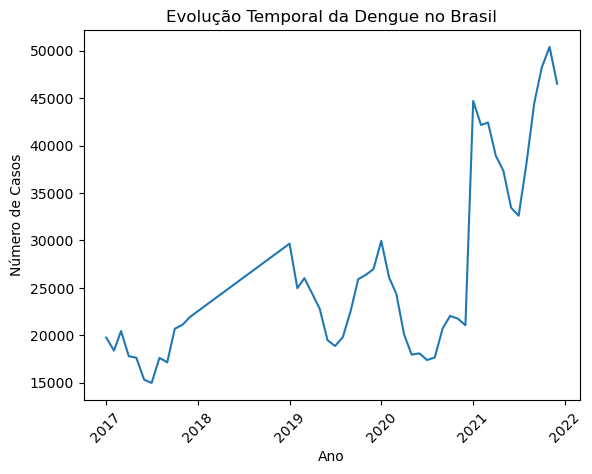

In [17]:
plt.plot(monthly_cases.index.to_timestamp(), monthly_cases.values)
plt.xlabel('Ano')
plt.ylabel('Número de Casos')
plt.title('Evolução Temporal da Dengue no Brasil')
plt.xticks(rotation=45)
plt.show()

## Plotando grafico em barra de Casos de Dengue por Região

Text(0, 0.5, 'Número de Casos')

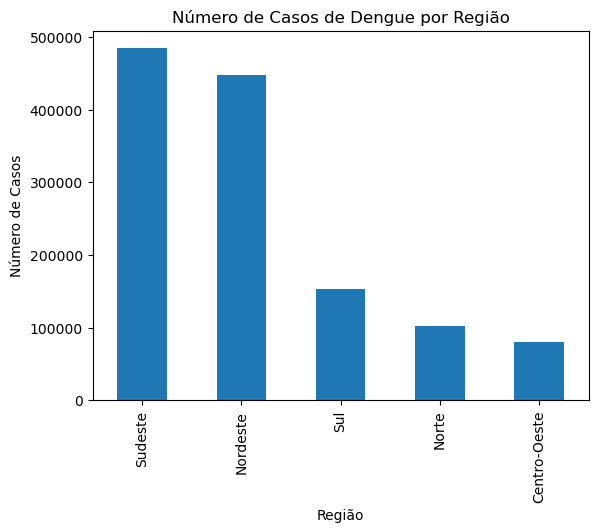

In [19]:
mapeamento_uf_regiao = {
    '11': 'Norte',
    '12': 'Norte',
    '13': 'Norte',
    '14': 'Norte',
    '15': 'Norte',
    '16': 'Norte',
    '17': 'Norte',
    '21': 'Nordeste',
    '22': 'Nordeste',
    '23': 'Nordeste',
    '24': 'Nordeste',
    '25': 'Nordeste',
    '26': 'Nordeste',
    '27': 'Nordeste',
    '28': 'Nordeste',
    '29': 'Nordeste',
    '31': 'Sudeste',
    '32': 'Sudeste',
    '33': 'Sudeste',
    '35': 'Sudeste',
    '41': 'Sul',
    '42': 'Sul',
    '43': 'Sul',
    '50': 'Centro-Oeste',
    '51': 'Centro-Oeste',
    '52': 'Centro-Oeste',
    '53': 'Centro-Oeste'
}

# Mapear os estados para regiões
df['Regiao'] = df['SG_UF_NOT'].map(mapeamento_uf_regiao)

registros_por_regiao = df['Regiao'].value_counts()

# Calcular a contagem de registros por região
registros_por_regiao = df['Regiao'].value_counts()

# Plotar o gráfico de barras
registros_por_regiao.plot.bar()

plt.title('Número de Casos de Dengue por Região')
plt.xlabel('Região')
plt.ylabel('Número de Casos')